# Text Feature Engineering

In [1]:
from __future__ import print_function

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

from sklearn.feature_extraction.text import TfidfVectorizer

%matplotlib inline

pd.options.mode.chained_assignment = None

In [2]:
train_df = pd.read_json('train.json')
train_df.head().T

,10,10000,100004,100007,100013
bathrooms,1.5,1,1,1,1
bedrooms,3,2,1,1,4
building_id,53a5b119ba8f7b61d4e010512e0dfc85,c5c8a357cba207596b04d1afd1e4f130,c3ba40552e2120b0acfc3cb5730bb2aa,28d9ad350afeaab8027513a3e52ac8d5,0
created,2016-06-24 07:54:24,2016-06-12 12:19:27,2016-04-17 03:26:41,2016-04-18 02:22:02,2016-04-28 01:32:41
description,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,,"Top Top West Village location, beautiful Pre-w...",Building Amenities - Garage - Garden - fitness...,Beautifully renovated 3 bedroom flex 4 bedroom...
display_address,Metropolitan Avenue,Columbus Avenue,W 13 Street,East 49th Street,West 143rd Street
features,[],"[Doorman, Elevator, Fitness Center, Cats Allow...","[Laundry In Building, Dishwasher, Hardwood Flo...","[Hardwood Floors, No Fee]",[Pre-War]
interest_level,medium,low,high,low,low
latitude,40.7145,40.7947,40.7388,40.7539,40.8241
listing_id,7211212,7150865,6887163,6888711,6934781


In [3]:
text_features_df = train_df[['features', 'description']]

In [4]:
features_df = text_features_df['features'].apply(lambda x: " ".join(x))

In [5]:
features_df.head()

10                                                         
10000     Doorman Elevator Fitness Center Cats Allowed D...
100004    Laundry In Building Dishwasher Hardwood Floors...
100007                               Hardwood Floors No Fee
100013                                              Pre-War
Name: features, dtype: object

In [6]:
features_df.shape

(49352,)

### Putting `features` through `TfidVectorizer`

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english', use_idf=True, max_df=0.20)
#ngram_range=(1, 2) - do not use ngrams as get features that do not make sense

listing_features_vectorizer = tfidf.fit_transform(features_df)

feature_array = np.array(tfidf.get_feature_names())
tfidf_sorting = np.argsort(listing_features_vectorizer.toarray()).flatten()[::-1]

n = 100
top_n = feature_array[tfidf_sorting][:n]
top_n

array([u'york', u'fees', u'entrance', u'entire', u'entertainment',
       u'entertain', u'enormous', u'end', u'enclosed', u'en', u'elev',
       u'elegant', u'elegance', u'electronic', u'electricity', u'electric',
       u'ego', u'effective', u'eat', u'easy', u'east', u'e60s', u'e50s',
       u'dyer', u'dw', u'duty', u'duplex', u'dryer', u'dry', u'drs',
       u'dressing', u'entrances', u'entryway', u'equal', u'extravagant',
       u'featuring', u'features', u'feature', u'fast', u'fans', u'fan',
       u'family', u'facing', u'facility', u'facilities', u'eye',
       u'extreme', u'extravaganza', u'extra', u'equipment', u'exquisite',
       u'exposure', u'exposed', u'expansive', u'exercise', u'executive',
       u'exclusive', u'excellent', u'excellence', u'events', u'european',
       u'eraser', u'equipped', u'drenched', u'dream', u'double',
       u'convertible', u'cpw', u'courtyard', u'courts', u'court',
       u'countertops', u'counters', u'counter', u'cost', u'corner',
       u'coord

In [8]:
listing_features_vectorizer.shape

(49352, 1029)

### Feature Selection on `features` via TruncatedSVD

In [9]:
from sklearn.decomposition import TruncatedSVD

lsa_f = TruncatedSVD(n_components=50, n_iter=100)

listing_features_lsa = lsa_f.fit_transform(listing_features_vectorizer)

In [10]:
listing_features_lsa.shape

(49352, 50)

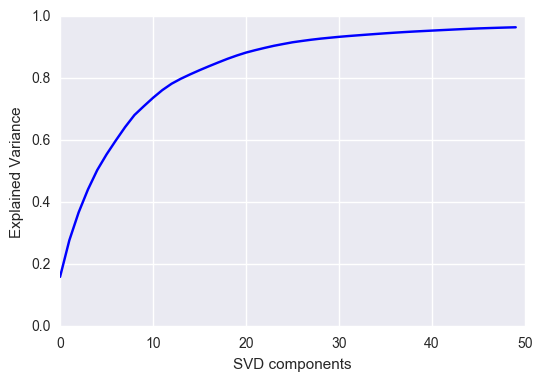

In [11]:
x = range(50)

plt.plot(x, np.cumsum(lsa_f.explained_variance_ratio_), color='blue')

plt.ylim(0, 1)

plt.xlabel('SVD components')
plt.ylabel('Explained Variance')
plt.show()

Looks like 50 is the ideal number for SVD components

## Preparing `description` for processing

In [12]:
description_df = text_features_df['description']
description_df.head()

10        A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...
10000                                                      
100004    Top Top West Village location, beautiful Pre-w...
100007    Building Amenities - Garage - Garden - fitness...
100013    Beautifully renovated 3 bedroom flex 4 bedroom...
Name: description, dtype: object

In [13]:
description_df.values[:20]

array([ u"A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy These Following Apartment Features As You Rent Here? Modern Designed Bathroom w/ a Deep Spa Soaking Tub? Room to Room AC/Heat? Real Oak Hardwood Floors? Rain Forest Shower Head? SS steel Appliances w/ Chef Gas Cook Oven & LG Fridge? washer /dryer in the apt? Cable Internet Ready? Granite Counter Top Kitchen w/ lot of cabinet storage spaceIt's Just A Few blocks To L Train<br /><br />Don't miss out!<br /><br />We have several great apartments in the immediate area.<br /><br />For additional information 687-878-2229<p><a  website_redacted ",
       u'        ',
       u'Top Top West Village location, beautiful Pre-war building with laundry in the basement and live in super!<br/><br/>Apartment features a large bedroom with closet. Separate living room, kitchen features granite tops, dishwasher and microwave included, marble bathroom and hardwood flooring. Building is very well maintained and conveniently located near A,C,E,L,1,2,3 tra

In [14]:
# Cleaning up the descriptions somewhat non-pythonically

description_df = description_df.str.lower()
description_df = description_df.str.replace(r'^\s+$', 'AFULLEMPYSTRING')
description_df = description_df.str.replace(r'<p><a  website_redacted ', ' ')
description_df = description_df.str.replace(r'!<br /><br />', ' ')
description_df = description_df.str.replace(r"<br', '/><br", ' ')
description_df = description_df.str.replace(r"\b(st.)\b", ' street ')
description_df = description_df.str.replace(r"\b(dr)\b", ' drive ')
description_df = description_df.str.replace(r"-", ' ')
description_df = description_df.str.replace(r"$amp;", '&')
description_df = description_df.str.replace(r"!", ' ')
description_df = description_df.str.replace(r"*", ' ')
description_df = description_df.str.replace(r"\(", ' ')
description_df = description_df.str.replace(r"\)", ' ')
description_df = description_df.str.replace(r"+", ' ')
description_df = description_df.str.replace(r"\t", ' ')
description_df = description_df.str.replace(r"\r", ' ')
description_df = description_df.str.replace(r"\b(hr)\b", ' hour')
description_df = description_df.str.replace(r"\b(w/)\b", ' with')
description_df = description_df.str.replace(r"<br />", ' ')
description_df = description_df.str.replace(r"<br/>", ' ')
description_df = description_df.str.replace(r"<br>", ' ') # can you do a wildcard to get rid of everything between <>
description_df = description_df.str.replace(r"/", ' ')
description_df = description_df.str.replace(r"\b(lg)\b", 'large')
description_df = description_df.str.replace(r"<a>", ' ')
description_df = description_df.str.replace(r"<li>", ' ')
description_df = description_df.str.replace(r"<ul>", ' ')
description_df = description_df.str.replace(r"(<.>)", ' ')

description_df = description_df.str.replace(r"\b(wi fi)\b", 'wi-fi')
description_df = description_df.str.replace(r"\b(wifi)\b", 'wi-fi')

description_df = description_df.str.replace(r"<[^>]*>", ' ')
description_df = description_df.str.replace(r"<a target=_blank  houref= website_redacted", ' ')

description_df = description_df.str.replace(r"\b(24  hour)\b", '24-hour')
description_df = description_df.str.replace(r"\b(24 hour)\b", '24-hour')
description_df = description_df.str.replace(r"\b(24hr)\b", '24-hour')

# regex for telephone numbers

# 123 456 7890
description_df = description_df.str.replace(r"\b\d{3}[\s]?\d{3}[\s]?\d{4}\b", ' ')

# 123 456 7890 + letters immediately after phone number
description_df = description_df.str.replace(r"\b\d{3}[\s]?\d{3}[\s]?\d{4}[a-z]+\b", ' ')

# letters immediately before number no space [a-z]123 456 7890
description_df = description_df.str.replace(r"\b[a-z]+\d{3}[\s]?\d{3}[\s]?\d{4}", ' ')

# 123.456.7890 or 123-456-7890
description_df = description_df.str.replace(r"\b\d{3}[-.]?\d{3}[-.]?\d{4}\b", ' ')

description_df = description_df.str.replace(r"\b(website_redacted)\b", ' ')

# regex to get rid of e-mail addresses
description_df = description_df.str.replace(r"\b(kagglemanager@renthop.com)\b", ' ')

# regex to get rid of word.com
description_df = description_df.str.replace(r"\b[a-z]+\.(com)\b", ' ')
description_df = description_df.str.replace(r"\b[a-z]+\.(net)\b", ' ')

# regex to get rid of www.
description_df = description_df.str.replace(r"\b(www.)\b", ' ')

# regex to get rid of .com
description_df = description_df.str.replace(r"\b(.com)\b", ' ')

# converting '&' to 'and' -- although this may be made moot by stop words
description_df = description_df.str.replace(r"&", 'and')

# removing question marks
description_df = description_df.str.replace(r"?", ' ')

# removing question marks
description_df = description_df.str.replace(r":", ' ')

# removing periods
description_df = description_df.str.replace(r".", ' ')

# removing 'eet'
description_df = description_df.str.replace(r"\b(eet)\b", ' ')

# removing 'pipes'
description_df = description_df.str.replace(r"|", '')

# removing '\'
description_df = description_df.str.replace(r"\\", ' ')

# removing '='
description_df = description_df.str.replace(r"=", ' ')

# removing '247'
description_df = description_df.str.replace(r"\b(247)\b", '24-hour 7-day')

# removing '[]' 
description_df = description_df.str.replace(r"\[", ' ')
description_df = description_df.str.replace(r"\]", ' ')

# removing 'web id #'
description_df = description_df.str.replace(r"\b(web id #)\b", ' ')

# removing 'contact'
description_df = description_df.str.replace(r"\b(contact)\b", ' ')
                                            
# removing 'e-mail'
description_df = description_df.str.replace(r"\b(e-mail)\b", ' ')                                            
description_df = description_df.str.replace(r"\b(e mail)\b", ' ')
description_df = description_df.str.replace(r"\b(email)\b", ' ')

# removing 'call and text'
description_df = description_df.str.replace(r"\b(call)\b", ' ')                                            
description_df = description_df.str.replace(r"\b(text)\b", ' ')
description_df = description_df.str.replace(r"\b(phone)\b", ' ')

# removing more tags
description_df = description_df.str.replace(r"<a target_blank href", ' ')

# removing more tags
description_df = description_df.str.replace(r";", ' ')

# removing '1000s'
description_df = description_df.str.replace(r"\b(1000s)\b", ' ')

# removing '@'at
description_df = description_df.str.replace(r"@", 'at')

# removing 'website'
description_df = description_df.str.replace(r"\b(website)\b", ' ')

# removing 'www'
description_df = description_df.str.replace(r"\b(www)\b", ' ')

# removing '_ and ~'
description_df = description_df.str.replace(r"_", ' ')
description_df = description_df.str.replace(r"~", ' ')

In [15]:
description_df.values[200:300]

array([ u'this pre war building located in the upper east side is pet friendly, has elevator and voice intercom  ',
       u"this spacious one bedroom apartment is located in manhattan's kips bay neighborhood  this elevator building has a 24-hour doorman, roof deck , and laundry  the 4, 5, 6, n, and r subway lines are all within walking distance  pictures are of a standard unit                ",
       u'make this stunning true 3 bedroom 2 bathroom apartment your new home  this gut renovated apartment features a beautiful open kitchen  living room layout as you enter the apartment divided by a granite counter top island, accompanied by white cabinetry, stainless steel appliances and inclusive of a dishwasher  each of the bedrooms can at least fit a queen size bed and perhaps a king size bed in perhaps 2 of the bedrooms  one of the bedrooms has an en suite bathroom with a stand up shower  all bedrooms has full closets as well as beautiful large windows allowing for lots of natural light

In [16]:
type(description_df)

pandas.core.series.Series

In [17]:
description_df.shape

(49352,)

### Putting `description` through `TfidVectorizer`

In [18]:
tfid_description_df = description_df
tfid_description_df.shape

(49352,)

In [19]:
tfidf = TfidfVectorizer(stop_words='english', use_idf=True, max_df=0.20)
#ngram_range=(1, 2) - do not use ngrams as get features that do not make sense, try it without stopwords

description_vectorizer = tfidf.fit_transform(tfid_description_df)

In [20]:
tfidf.get_feature_names()[0:20]

[u'00',
 u'000',
 u'0000',
 u'000guarantors',
 u'000july',
 u'000large',
 u'000may',
 u'000s',
 u'000sf',
 u'000sft',
 u'000sq',
 u'000sqft',
 u'0058',
 u'0068',
 u'0079',
 u'0085',
 u'0090',
 u'00am',
 u'00apartment',
 u'00call']

In [21]:
len(tfidf.get_feature_names())

34784

### Feature Selection on `description` via TruncatedSVD

In [22]:
lsa_d = TruncatedSVD(n_components=1500,n_iter=100)

description_lsa = lsa_d.fit_transform(description_vectorizer)

In [23]:
description_lsa.shape

(49352, 1500)

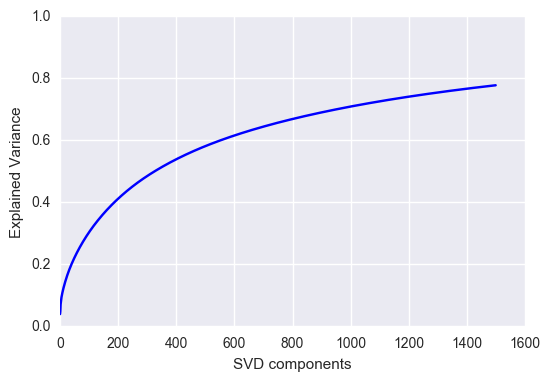

In [24]:
x = range(1500)

plt.plot(x, np.cumsum(lsa_d.explained_variance_ratio_), color='blue')

plt.ylim(0, 1)

plt.xlabel('SVD components')
plt.ylabel('Explained Variance')
plt.show()

100 SVD components did not explain much of the variation, raising to 1000 75%.  Going to try 1500.  Tried 2000 and it was it a marginal improvement -- looks like 1500 is a good compromise, even before the porter and lemmatizer.

In [25]:
description_lsa.shape

(49352, 1500)

In [26]:
description_lsa

array([[ -1.78742278e-15,   1.58851184e-01,  -6.85854125e-02, ...,
          9.97330777e-03,  -3.28581633e-03,   2.88578828e-03],
       [  1.00000000e+00,   3.49813800e-15,   7.60804286e-14, ...,
          5.13225852e-15,   1.50771620e-14,  -7.86715196e-16],
       [ -1.87059496e-15,   3.68750727e-01,   2.25849273e-01, ...,
          1.38059938e-03,   9.24750534e-03,  -3.27692106e-03],
       ..., 
       [ -9.14252169e-16,   1.72843675e-01,  -1.04080892e-01, ...,
         -3.59325765e-04,   4.52080983e-03,   1.07663653e-02],
       [ -7.60634460e-16,   1.44605389e-01,  -1.09697575e-01, ...,
         -2.60282813e-03,  -3.76582921e-03,  -2.45541800e-02],
       [ -1.62602896e-15,   3.11724080e-01,   1.38104274e-01, ...,
         -6.57823493e-04,   9.75914265e-03,  -4.00885190e-03]])

In [27]:
# np.save('X_long_text_wolem', description_lsa)